# How To Pick A Good Cointegrating Pair

## Introduction
...

Import packages

In [1]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt

Magic

In [2]:
%matplotlib inline

## Securities
1. VanEck Vectors Gold Miners ETF (GDX)
https://sg.finance.yahoo.com/quote/GDX?p=GDX
2. SPDR Gold Shares (GLD)
https://sg.finance.yahoo.com/quote/GLD?p=GLD
3. The Coca-Cola Company (KO)
https://sg.finance.yahoo.com/quote/KO?p=KO
4. PepsiCo, Inc. (PEP)
https://sg.finance.yahoo.com/quote/PEP?p=PEP
5. Bitcoin USD (BTC-USD)
https://sg.finance.yahoo.com/quote/BTC-USD?p=BTC-USD
6. Ethereum USD (ETH-USD)
https://sg.finance.yahoo.com/quote/ETH-USD?p=ETH-USD

Script to pull securities data

In [3]:
# Set tickers to load
tickers = ['GDX', 'GLD', 'KO', 'PEP', 'BTC-USD', 'ETH-USD']

# Initialize list of DataFrames
df_list = []

# Load DataFrames
for i in tickers:
    
    # Load data
    df = pd.read_csv(i + '.csv', index_col=0, parse_dates=True)    
    
    # Set multi-level columns
    df.columns = pd.MultiIndex.from_product([[i], ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
    
    # 
    df_list.append(df)
    
# Merge DataFrames
data = pd.concat(df_list, axis=1, join='inner')

# Drop NaNs
data.dropna(inplace=True)

Inspect

In [4]:
data.head()

GDX                                                    GLD  \
             Open   High    Low  Close  Adj Close     Volume        Open   
Date                                                                       
2015-08-06  13.21  13.69  13.11  13.36  13.033523   69121200  104.150002   
2015-08-07  13.42  13.85  13.33  13.40  13.072546   50618200  104.559998   
2015-08-10  13.57  14.29  13.36  14.27  13.921287   91376800  105.029999   
2015-08-11  14.44  14.53  13.94  14.53  14.174931   53731900  106.489998   
2015-08-12  14.81  15.53  14.78  15.52  15.140740  123217200  106.989998   

                                                ...       BTC-USD              \
                  High         Low       Close  ...           Low       Close   
Date                                            ...                             
2015-08-06  104.860001  104.139999  104.389999  ...    274.279999  277.890015   
2015-08-07  105.379997  104.550003  104.650002  ...    257.420013  258.600006   
2015-08-10  106.269997  104.919998  105.720001  ...    261.440002  269.029999   
2015-08-11  106.629997  105.769997  106.260002  ...    263.660004  267.660004   
2015-08-12  107.910004  106.930000  107.750000  ...    261.279999  263.440002   

                                 ETH-USD                                  \
             Adj Close    Volume    Open   High     Low  Close Adj Close   
Date                                                                       
2015-08-06  277.890015  11919665  0.6747  3.000  0.6747  3.000     3.000   
2015-08-07  258.600006  22308123  3.0000  3.000  0.1500  1.200     1.200   
2015-08-10  269.029999  13681939  1.2000  1.200  0.6504  0.990     0.990   
2015-08-11  267.660004  15232934  0.9900  1.288  0.9050  1.288     1.288   
2015-08-12  263.440002  14962211  1.2880  1.885  1.2630  1.885     1.885   

                   
           Volume  
Date               
2015-08-06    371  
2015-08-07   1438  
2015-08-10   7419  
2015-08-11   2376  
2015-08-12   4923  

[5 rows x 36 columns]

In [5]:
data.tail()

GDX                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2019-07-08  25.450001  25.610001  25.209999  25.420000  25.420000  40606100   
2019-07-09  25.330000  25.660000  25.209999  25.650000  25.650000  37529700   
2019-07-10  26.020000  26.230000  25.770000  26.200001  26.200001  56454300   
2019-07-11  26.129999  26.280001  25.719999  25.940001  25.940001  54013400   
2019-07-12  26.000000  26.250000  25.870001  26.209999  26.209999  31795200   

                   GLD                                        ...      \
                  Open        High         Low       Close    ...       
Date                                                          ...       
2019-07-08  132.179993  132.339996  131.279999  131.289993    ...       
2019-07-09  131.429993  132.100006  131.160004  131.750000    ...       
2019-07-10  132.940002  133.869995  132.350006  133.830002    ...       
2019-07-11  133.580002  133.699997  132.410004  132.699997    ...       
2019-07-12  132.889999  133.690002  132.529999  133.529999    ...       

                 BTC-USD                                             ETH-USD  \
                     Low         Close     Adj Close      Volume        Open   
Date                                                                           
2019-07-08  12117.309570  12567.019531  12567.019531   993891866  313.339996   
2019-07-09  11569.940430  12099.120117  12099.120117  1554955347  307.890015   
2019-07-10  11002.389648  11343.120117  11343.120117  1185222449  288.640015   
2019-07-11  11096.610352  11797.370117  11797.370117   647690095  268.559998   
2019-07-12  10827.530273  11363.969727  11363.969727   668325183  275.410004   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2019-07-08  318.320007  303.089996  307.890015  307.890015  125850428  
2019-07-09  314.739990  281.619995  288.640015  288.640015  180940011  
2019-07-10  288.660004  263.000000  268.559998  268.559998  171079615  
2019-07-11  279.059998  266.459991  275.410004  275.410004   76685542  
2019-07-12  275.720001  261.809998  268.940002  268.940002   66861426  

[5 rows x 36 columns]

Adjusted close prices

In [6]:
# Initialize dictionary of adjusted close
close_dict = {}

# Update dictionary
for i in tickers:
    close_dict[i] = data[i]['Adj Close']
    
# Create DataFrame
close = pd.DataFrame(close_dict)

Inspect

In [7]:
close.head()

,GDX,GLD,KO,PEP,BTC-USD,ETH-USD
Date,,,,,,
2015-08-06,13.033523,104.389999,36.744549,87.997078,277.890015,3.000
2015-08-07,13.072546,104.650002,36.613060,87.952690,258.600006,1.200
2015-08-10,13.921287,105.720001,36.534176,87.943817,269.029999,0.990
2015-08-11,14.174931,106.260002,36.358871,87.526695,267.660004,1.288
2015-08-12,15.140740,107.750000,36.166031,87.313683,263.440002,1.885


In [8]:
close.tail()

,GDX,GLD,KO,PEP,BTC-USD,ETH-USD
Date,,,,,,
2019-07-08,25.420000,131.289993,52.000000,132.559998,12567.019531,307.890015
2019-07-09,25.650000,131.750000,51.590000,131.740005,12099.120117,288.640015
2019-07-10,26.200001,133.830002,51.820000,134.410004,11343.120117,268.559998
2019-07-11,25.940001,132.699997,52.040001,134.350006,11797.370117,275.410004
2019-07-12,26.209999,133.529999,52.119999,133.279999,11363.969727,268.940002


Plot

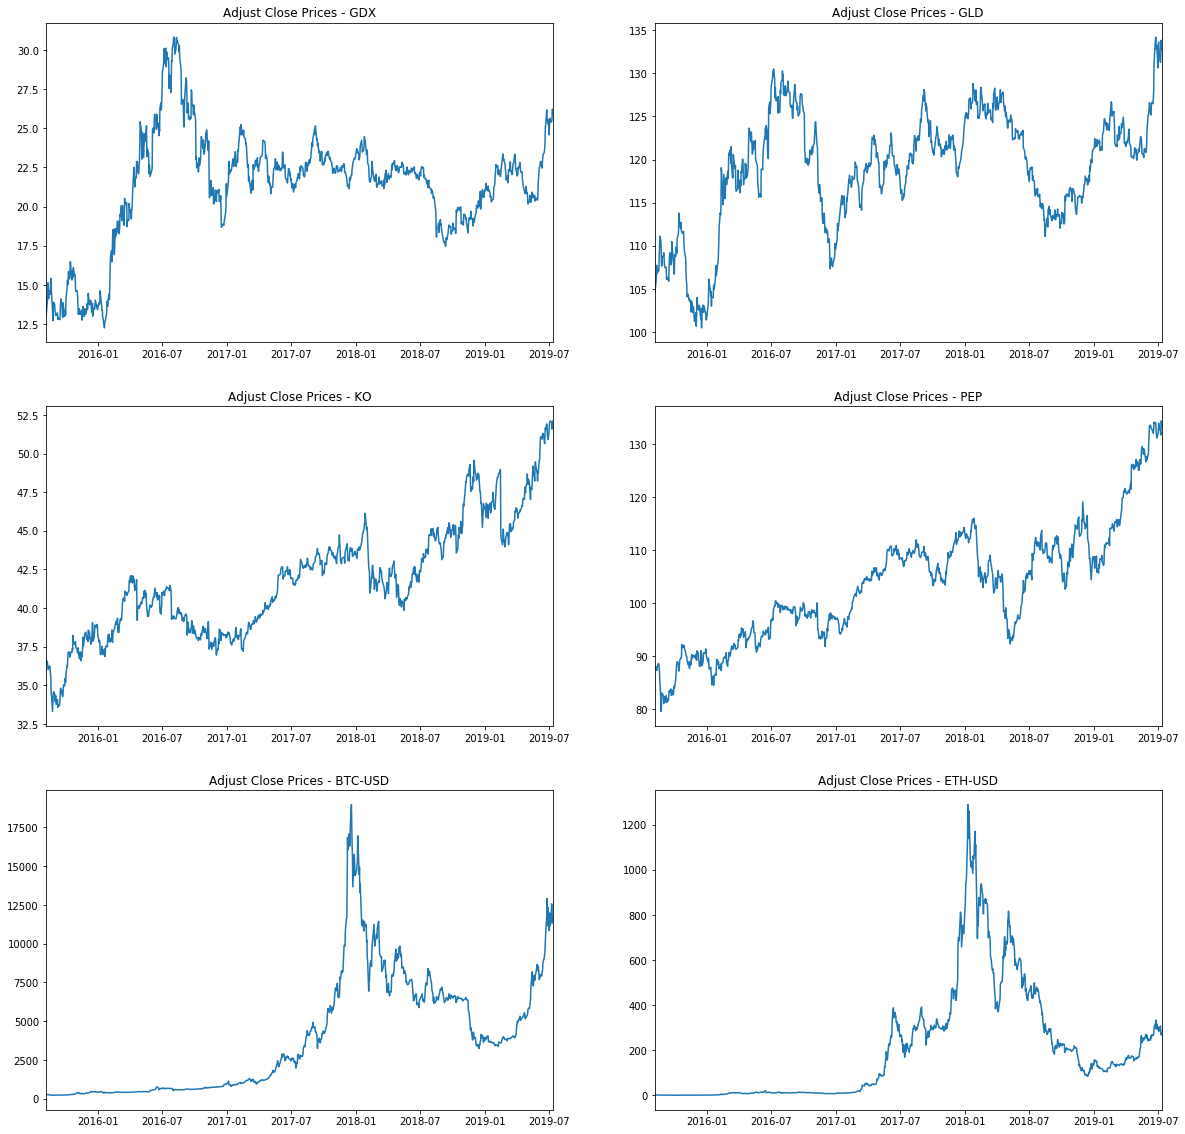

In [9]:
plt.figure(figsize=(20, 20))

for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(close[tickers[i]])
    plt.xlim([close.index[0], close.index[-1]])
    plt.title('Adjust Close Prices - ' + tickers[i])

## Augmented Dickey-Fuller Test (ADF)
...

Run cointegration check using augmented Dickey-Fuller test

In [10]:
stats_list = []

for i in tickers:

    # ADF
    stats = adfuller(close[i])
    
    # Update list
    stats_list.append(stats)

Create test statistics DataFrame

In [11]:
stats_dict = {}

for i in range(len(tickers)):
    
    # Update dict
    stats_dict[tickers[i]] = [stats_list[i][0],
                              stats_list[i][1],
                              stats_list[i][4]['1%'], stats_list[i][4]['5%'], stats_list[i][4]['10%']]
    
# Create DataFrame
statistics = pd.DataFrame(stats_dict,
                          index=['ADF Statistic', 'P-value', '1%', '5%', '10%'])

Analysis of results

In [12]:
statistics

,GDX,GLD,KO,PEP,BTC-USD,ETH-USD
ADF Statistic,-2.155847,-2.169559,-0.654886,-0.366721,-1.260439,-2.360259
P-value,0.222659,0.217479,0.858092,0.915509,0.647072,0.153268
1%,-3.437006,-3.436979,-3.437013,-3.436979,-3.437123,-3.437075
5%,-2.864479,-2.864467,-2.864482,-2.864467,-2.864530,-2.864509
10%,-2.568335,-2.568328,-2.568336,-2.568328,-2.568362,-2.568351


Remarks:
1. For GDX, the ADF statistic is -2.16 which is larger than the critical values, meaning we cannot reject null hypothesis i.e. GDX is not stationary.
2. For GLD, the ADF statistic is -2.17 which is larger than the critical values, meaning we cannot reject null hypothesis i.e. GLD is not stationary.
3. For KO, the ADF statistic is -0.65 which is larger than the critical values, meaning we cannot reject null hypothesis i.e. KO is not stationary.
4. For PEP, the ADF statistic is -0.37 which is larger than the critical values, meaning we cannot reject null hypothesis i.e. PEP is not stationary.
9. For BTC-USD, the ADF statistic is -1.26 which is larger than the critical values, meaning we can reject null hypothesis i.e. BTC-USD is not stationary.
10. For ETH-USD, the ADF statistic is -2.36 which is larger than the critical values, meaning we cannot reject null hypothesis i.e. ETH-USD is not stationary.

## Calculate The Spread
...

Form natural pairs:
1. GDX and GLD;
2. KO and PEP; and 
3. BTC-USD and ETH-USD.

In [13]:
tickers_pairs= ['GDX/GLD', 'KO/PEP', 'BTC/ETH']

We calculate the spread between each pair.

In [14]:
# Initialize the spread list
spread_list = []

for i in range(len(tickers_pairs)):
    
    # Run an OLS regression between the pairs
    model = sm.regression.linear_model.OLS(close[tickers[2*i]], close[tickers[2*i+1]])

    # Calculate the hedge ratio
    results = model.fit()
    hedge_ratio = results.params[0]
    
    # Calculate the spread
    spread = close[tickers[2*i]] - hedge_ratio * close[tickers[2*i+1]]
    
    # Mean and standard deviation of the spread
    spread_mean = spread.mean()
    spread_std = spread.std()
    
    # Standardize the spread
    z_score = (spread - spread_mean) / spread_std
    
    # Update the spread list
    spread_list.append(z_score)

Plot

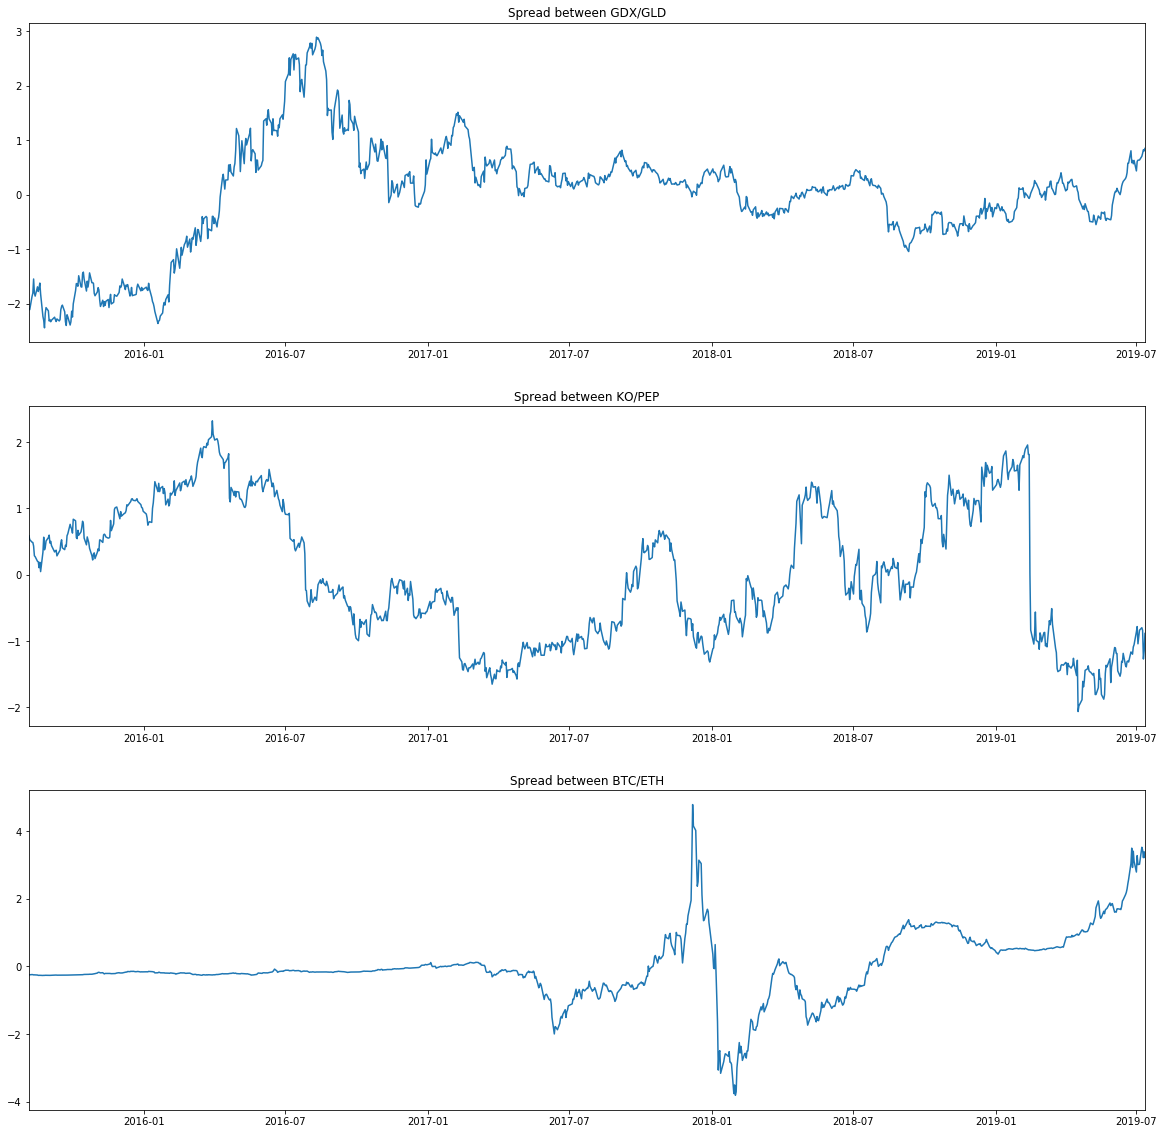

In [15]:
plt.figure(figsize=(20, 20))

for i in range(len(tickers_pairs)):
    plt.subplot(3, 1, i+1)
    plt.plot(spread_list[i])
    plt.xlim([spread.index[0], spread.index[-1]])
    plt.title('Spread between ' + tickers_pairs[i])

Run cointegration check using augmented Dickey-Fuller test

In [16]:
stats_list = []

for i in range(len(spread_list)):
    
    # 
    stats = adfuller(spread_list[i])
    
    # 
    stats_list.append(stats)

Create test statistics DataFrame

In [17]:
tickers_pairs= ['GDX/GLD', 'KO/PEP', 'BTC/ETH']

In [18]:
# Initialize dict
stats_dict = {}

for i in range(len(tickers_pairs)):
    
    # Update dict
    stats_dict[tickers_pairs[i]] = [stats_list[i][0],
                                    stats_list[i][1],
                                    stats_list[i][4]['1%'], stats_list[i][4]['5%'], stats_list[i][4]['10%']]

# Create DataFrame
statistics = pd.DataFrame(stats_dict,
                          index=['ADF Statistic', 'P-value', '1%', '5%', '10%'])

Inspect

In [19]:
statistics

,GDX/GLD,KO/PEP,BTC/ETH
ADF Statistic,-2.220862,-2.129590,-2.980292
P-value,0.198761,0.232784,0.036776
1%,-3.437006,-3.437040,-3.437131
5%,-2.864479,-2.864494,-2.864534
10%,-2.568335,-2.568343,-2.568364


Remarks:
1. For the spread between GDX and GLD, the ADF statistic is -2.22 which is higher than the critical values, meaning we cannot reject the null hypothesis i.e. spread between GDX and GLD is not stationary. 
2. For the spread between KO and PEP, the ADF statistic is -2.13 which is higher than the critical values, meaning we cannot reject the null hypothesis i.e. spread between KO and PEP is not stationary.
3. For the spread between BTC-USD and ETH-USD, the ADF statistic is -2.98 which is lower than the critical values, meaning we can reject the null hypothesis i.e. **spread between BTC-USD and ETH-USD is stationary**. *Note that there is a 5% chance this could be a statistical fluke*.

## Conclusion
...